# topic : precentile outliers dections and removel 

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\weight-height.csv")

In [8]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Weight'>

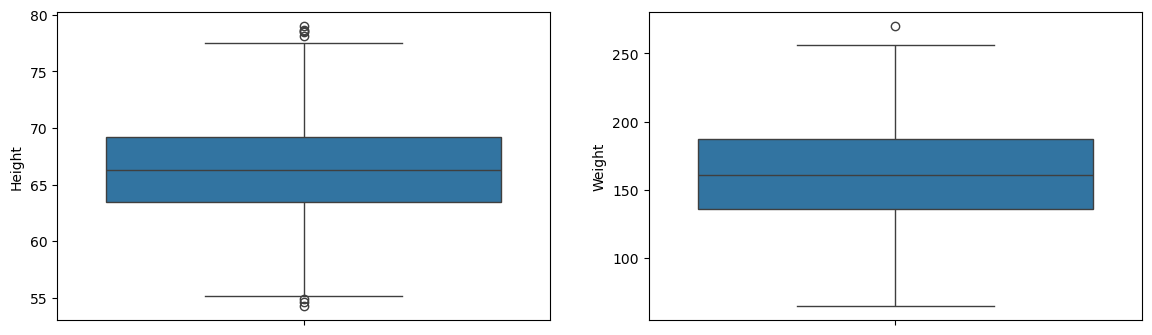

In [24]:

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(data["Height"])

plt.subplot(122)
sns.boxplot(data["Weight"])

In [26]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# (1 or 99) percentile use 

In [29]:
upper_limit=data["Height"].quantile(.99)
lower_limit=data["Height"].quantile(.1)

In [31]:
upper_limit,lower_limit

(74.7857900583366, 61.41270131336016)

# cxapping(winsorization)

In [36]:
data["Height"]=np.where(
    data["Height"]>upper_limit,
        upper_limit,
    np.where(
        data['Height']<lower_limit,
        lower_limit,
            data["Height"]
    )
)

In [42]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.506145,161.440357
std,3.563960,32.108439
min,61.412701,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699


<Axes: ylabel='Height'>

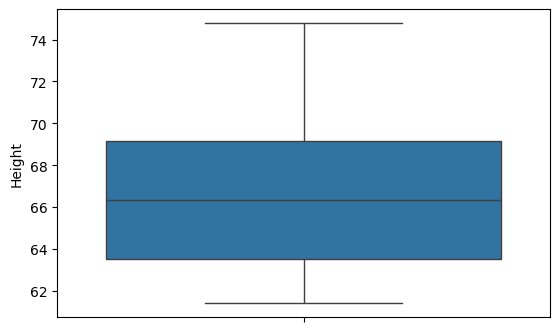

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(data["Height"])
